In [382]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import seaborn as sns

In [383]:
dfsp = pd.read_csv('C:/Users/ishika/Downloads/Netflix.csv',index_col='Date',parse_dates=True)

In [384]:
dfsp.head()

,Open,High,Low,Close,Volume
Date,,,,,
2005-02-25,13.583,13.693,13.430,13.693,156240
2005-02-28,13.697,13.827,13.540,13.827,370509
2005-03-01,13.780,13.913,13.720,13.760,224484
2005-03-02,13.717,13.823,13.667,13.810,286431
2005-03-03,13.783,13.783,13.587,13.630,193824


In [385]:
dfsp.describe()  

,Open,High,Low,Close,Volume
count,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03
mean,41.800246,42.127681,41.465992,41.826403,7.830475e+05
std,23.728163,23.847994,23.593876,23.730770,6.482674e+05
min,13.170000,13.270000,11.010000,13.180000,5.236800e+04
25%,22.653000,22.907000,22.370000,22.643000,3.591570e+05
50%,33.100000,33.430000,32.800000,33.150000,5.823510e+05
75%,57.550000,57.890000,57.240000,57.550000,1.033461e+06
max,102.450000,102.600000,101.840000,102.380000,1.388090e+07


In [386]:
dfsp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3201 entries, 2005-02-25 to 2017-11-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3201 non-null   float64
 1   High    3201 non-null   float64
 2   Low     3201 non-null   float64
 3   Close   3201 non-null   float64
 4   Volume  3201 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 150.0 KB


In [387]:
dfsp.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

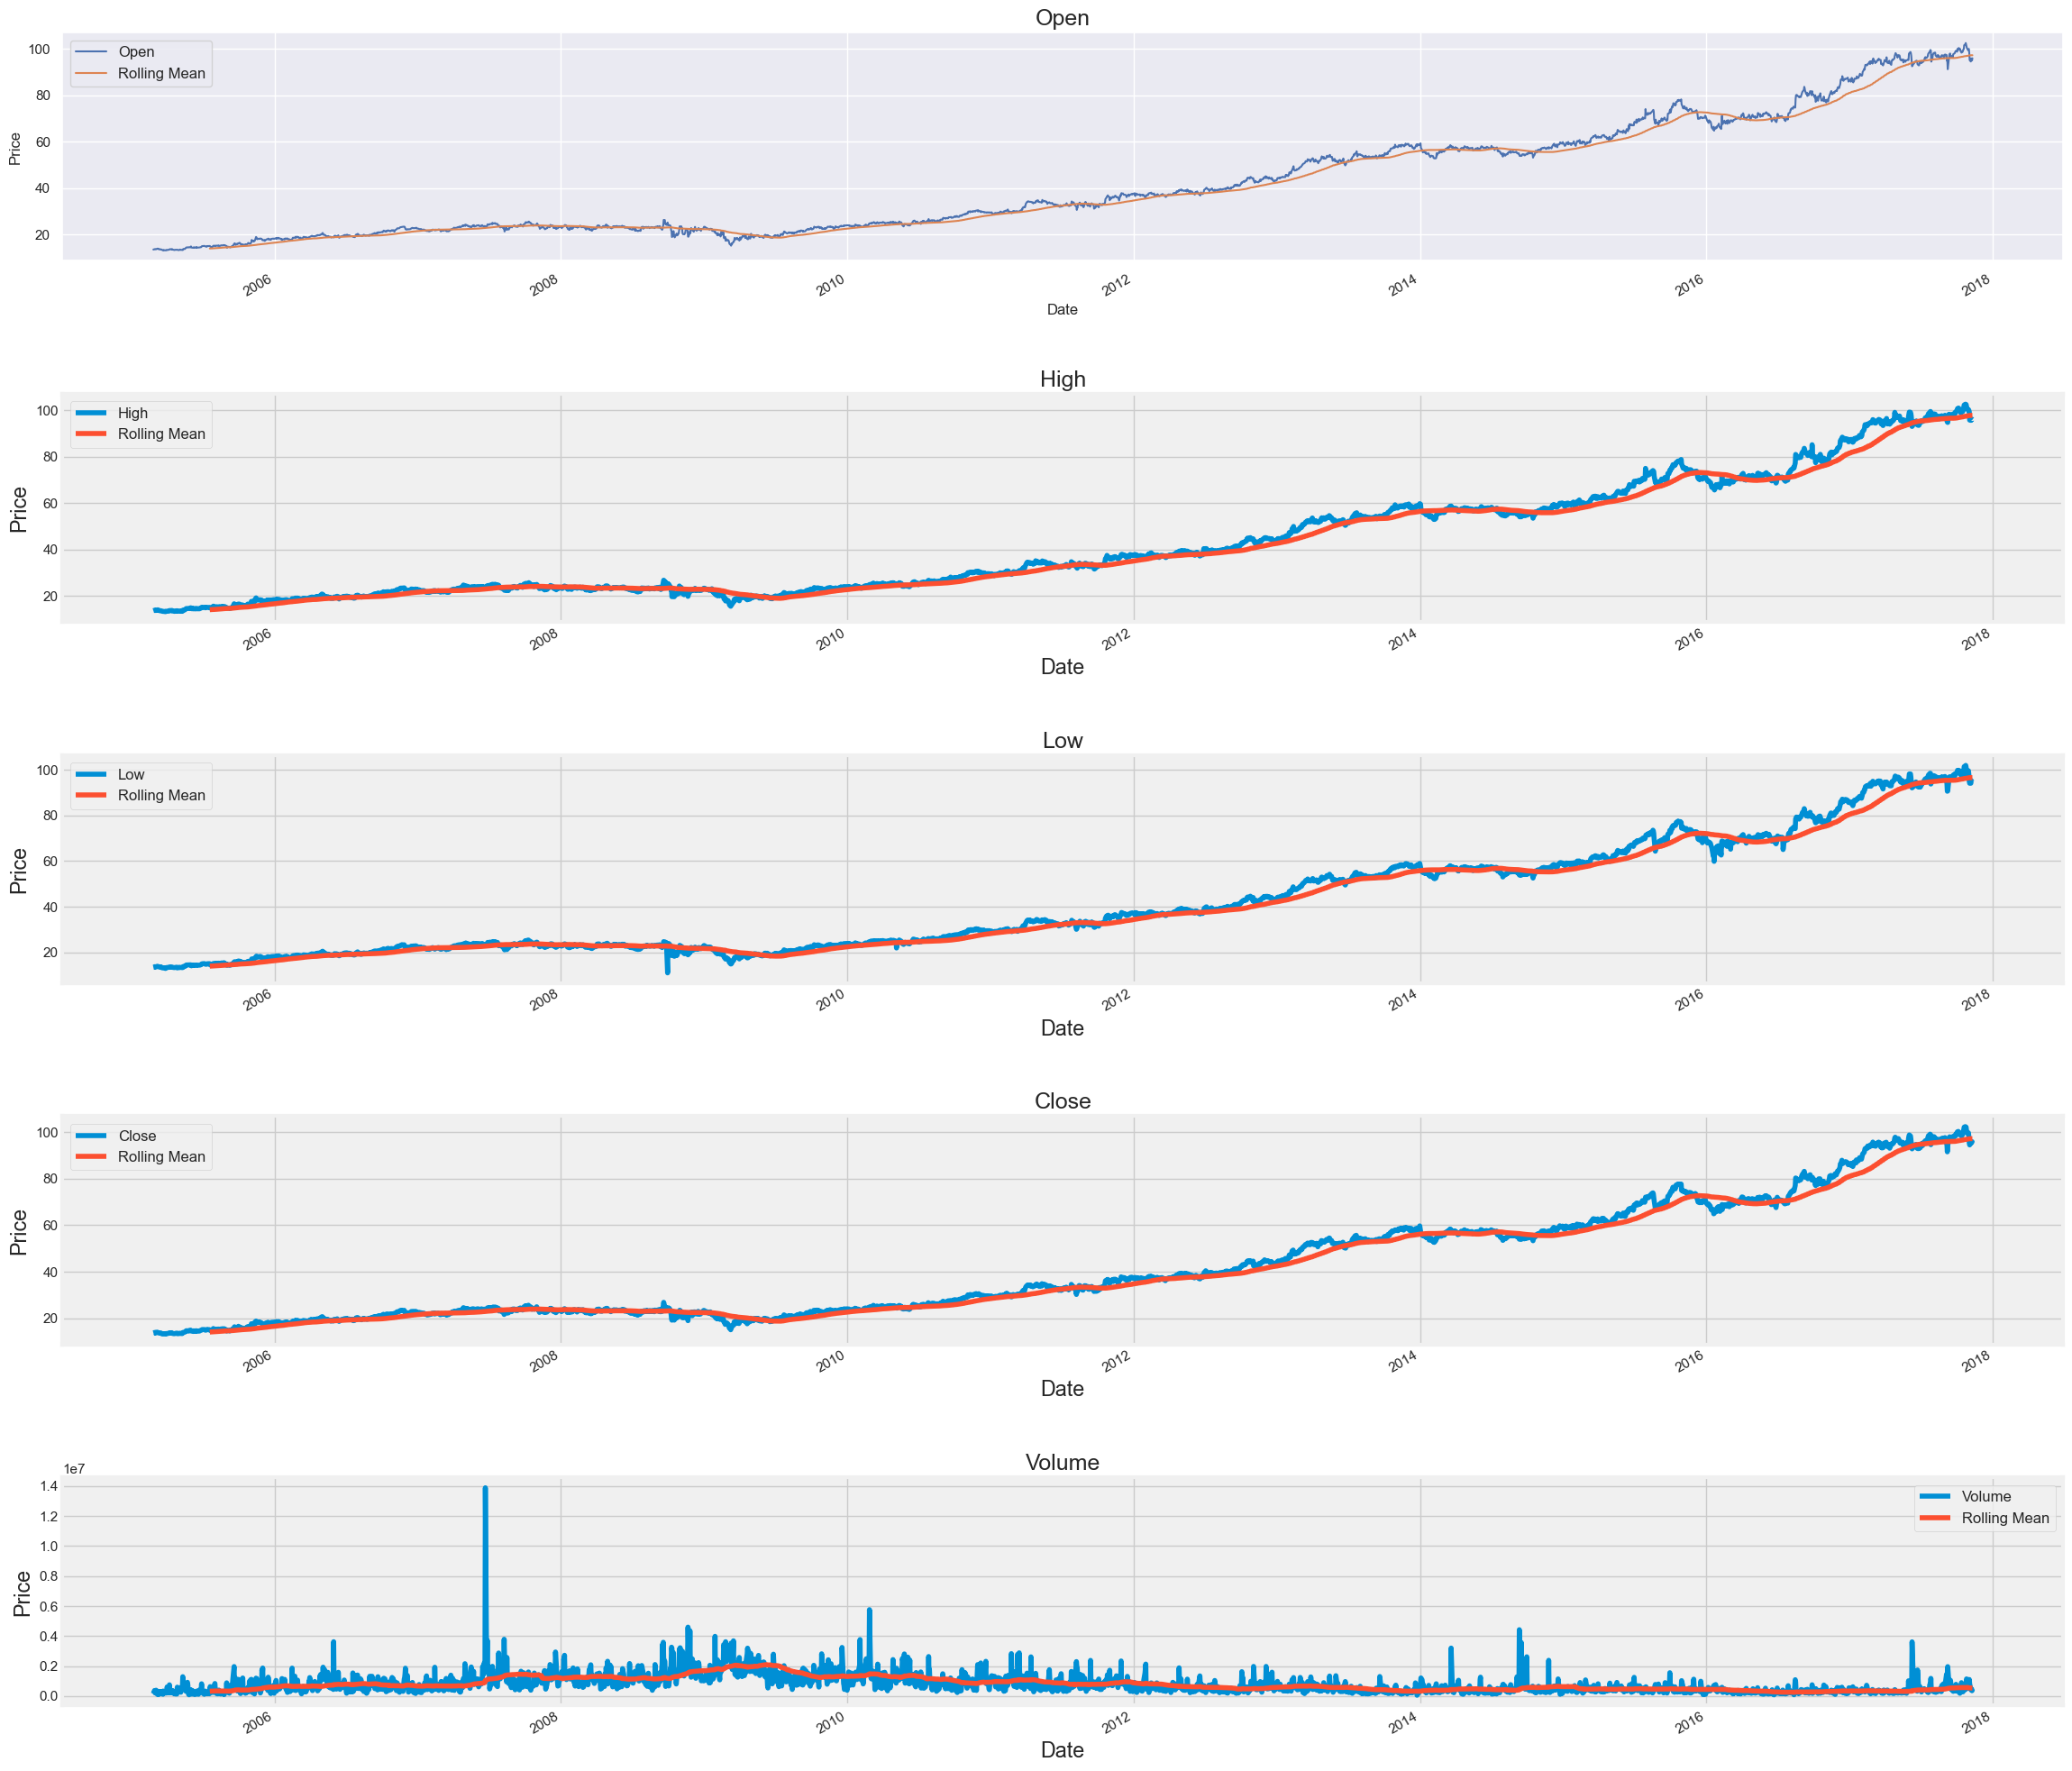

In [388]:
col_names = dfsp.columns
fig = plt.figure(figsize=(24, 24))
for i in range(5):
  ax = fig.add_subplot(6,1,i+1)
  ax.plot(dfsp.iloc[:,i],label=col_names[i])
  dfsp.iloc[:,i].rolling(100).mean().plot(label='Rolling Mean')
  ax.set_title(col_names[i],fontsize=18)
  ax.set_xlabel('Date')
  ax.set_ylabel('Price')
  ax.patch.set_edgecolor('black')  
  plt.style.context('fivethirtyeight')
  plt.legend(prop={'size': 12})
  plt.style.use('fivethirtyeight')

fig.tight_layout(pad=3.0)

plt.show()

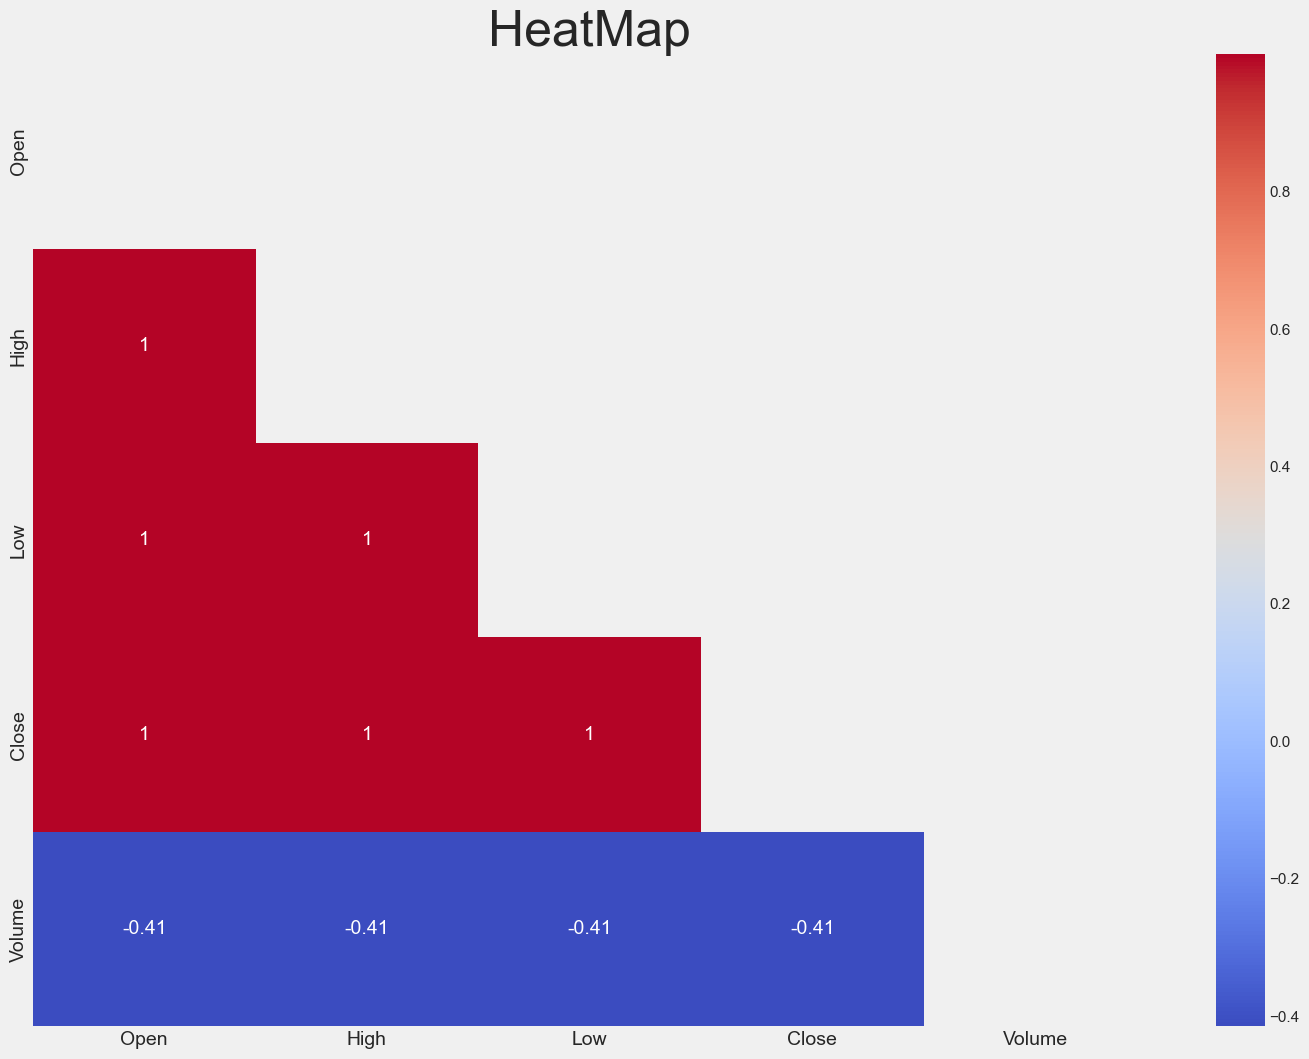

In [389]:
##HeatMap to Verify Multicollinearity between Features
fig = plt.figure(figsize=(16,12))
matrix = np.triu(dfsp.corr())
ax = sns.heatmap(dfsp.corr(),annot=True,annot_kws={"size":14},mask=matrix,cmap='coolwarm')
ax.tick_params(labelsize=14)
sns.set(font_scale=3)
ax.set_title('HeatMap')
plt.style.use('fivethirtyeight')
plt.show()

In [390]:
df1 = dfsp.drop(axis=1,labels=['Open','High','Low','Volume'])

In [391]:
col_order = ['Close']
df1 = df1.reindex(columns=col_order)
df1

,Close
Date,
2005-02-25,13.693
2005-02-28,13.827
2005-03-01,13.760
2005-03-02,13.810
2005-03-03,13.630
...,...
2017-11-06,95.550
2017-11-07,95.560
2017-11-08,95.450


In [392]:
monthly_mean = df1['Close'].resample('M').mean()

In [393]:
monthly_data = monthly_mean.to_frame()
monthly_data

,Close
Date,
2005-02-28,13.760000
2005-03-31,13.553682
2005-04-30,13.490381
2005-05-31,14.037762
2005-06-30,14.565091
...,...
2017-07-31,96.548500
2017-08-31,96.932609
2017-09-30,96.865500


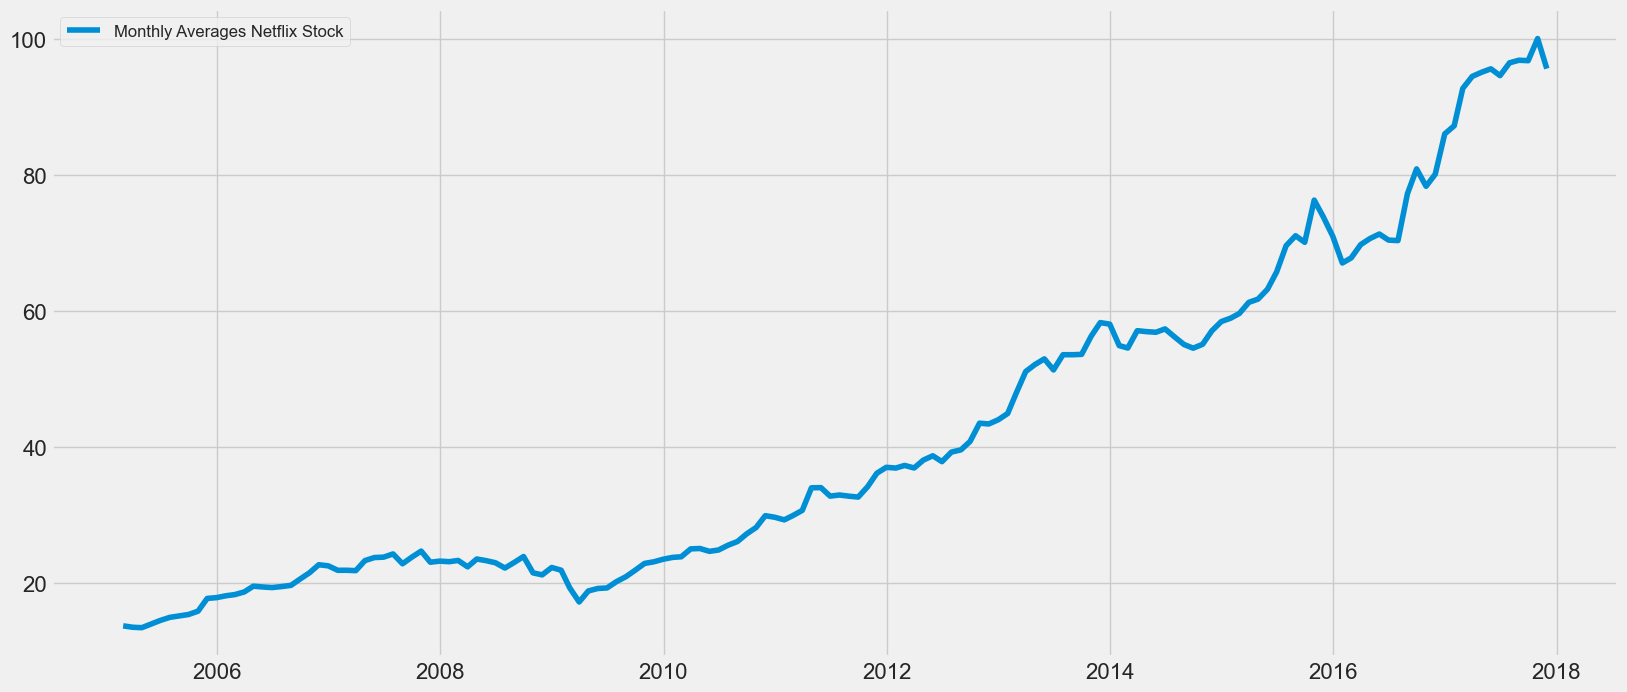

In [394]:
##Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Close'],label='Monthly Averages Netflix Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

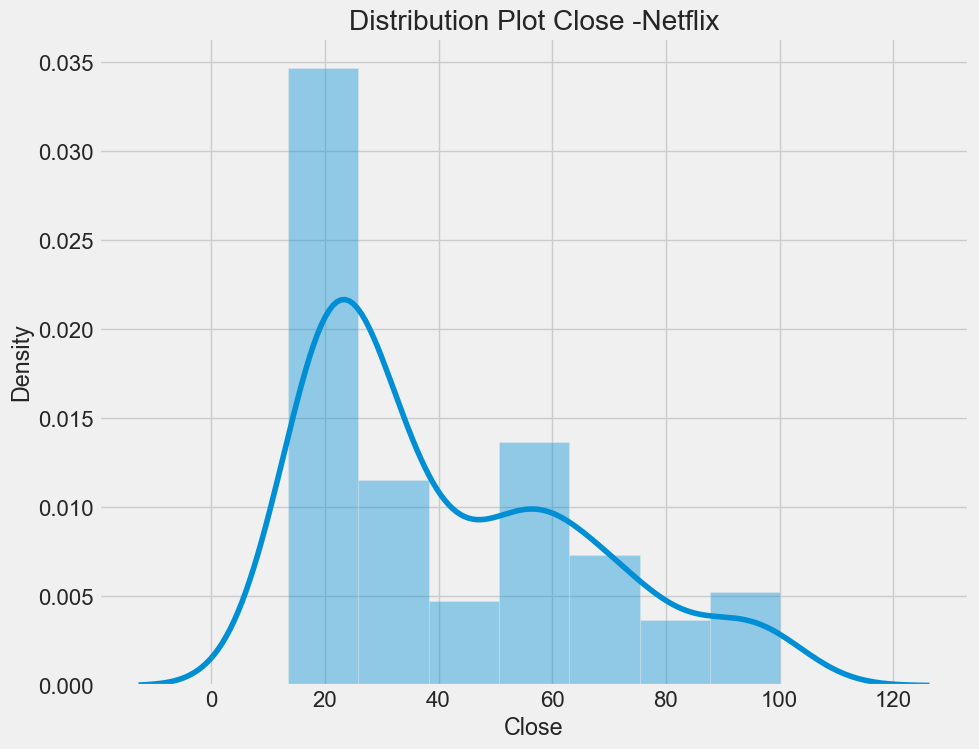

In [395]:
fig = plt.figure(figsize=(10,8))
sns.distplot(monthly_data['Close']).set_title("Distribution Plot Close -Netflix")
ax.tick_params(labelsize=12)
sns.set(font_scale=1)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

Distribution Plot Inference : Distribution shows Right Skew

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


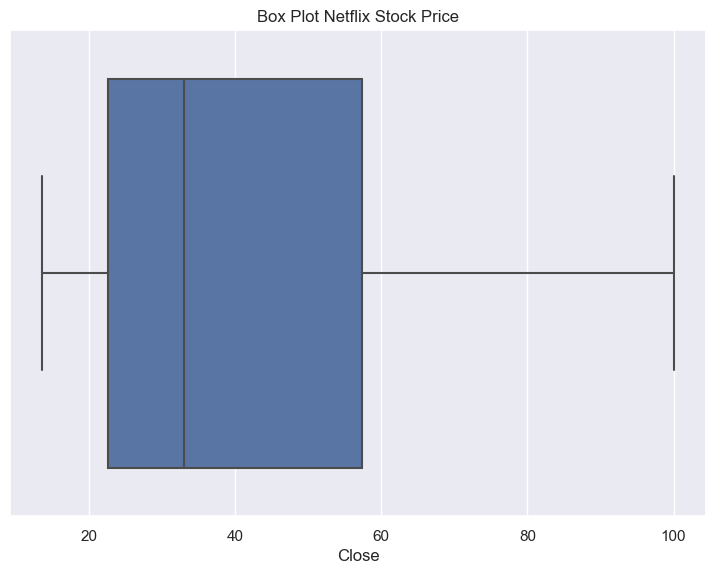

In [396]:
fig = plt.figure(figsize=(8,6))
sns.boxplot(monthly_data['Close']).set_title('Box Plot Netflix Stock Price')
plt.style.context('fivethirtyeight')

<Figure size 2000x1600 with 0 Axes>

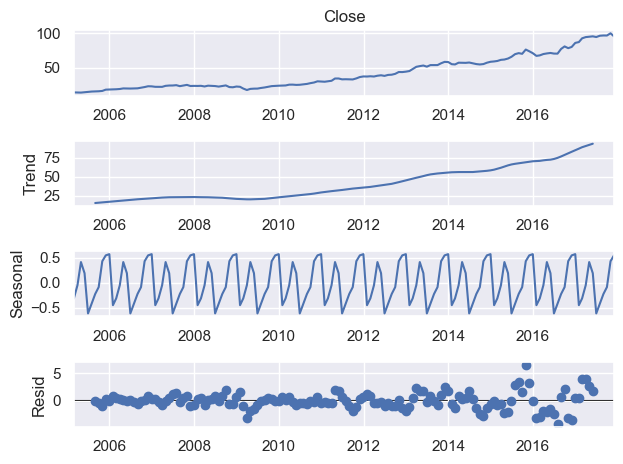

In [397]:
from statsmodels.tsa.seasonal import seasonal_decompose as sd
'''from pylab import rcParams
rcParams['figure.figsize'] = 18, 8'''
plt.figure(figsize=(20,16))
decomposed_series = sd(monthly_data['Close'],model='additive')
decomposed_series.plot()
plt.show()

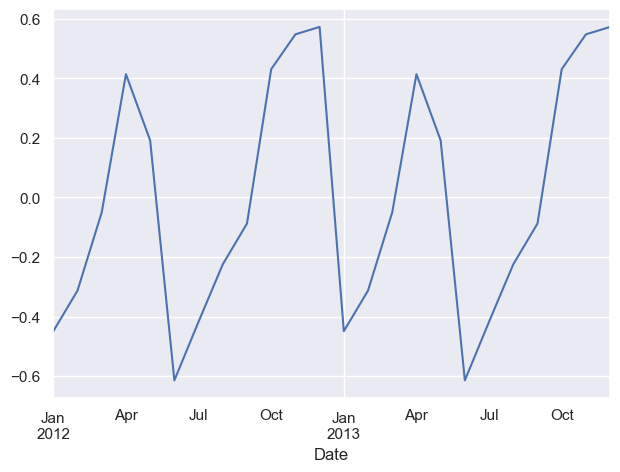

<Figure size 800x800 with 0 Axes>

In [398]:
##Drilling Down and Observing Seasonality
decomposed_series.seasonal['2012':'2013'].plot()
fig = plt.figure(figsize=(8,8))

overall upward trend

In [399]:
modelling_series.head()

Date
2005-02-28    13.760000
2005-03-31    13.553682
2005-04-30    13.490381
2005-05-31    14.037762
2005-06-30    14.565091
Freq: M, Name: Close, dtype: float64

In [400]:
train_data.head()

Date
2005-05-31    14.037762
2005-06-30    14.565091
2005-07-31    15.012850
2005-08-31    15.225130
2005-09-30    15.429905
Freq: M, Name: Close, dtype: float64

In [401]:
monthly_data.head()

,Close
Date,
2005-02-28,13.760000
2005-03-31,13.553682
2005-04-30,13.490381
2005-05-31,14.037762
2005-06-30,14.565091


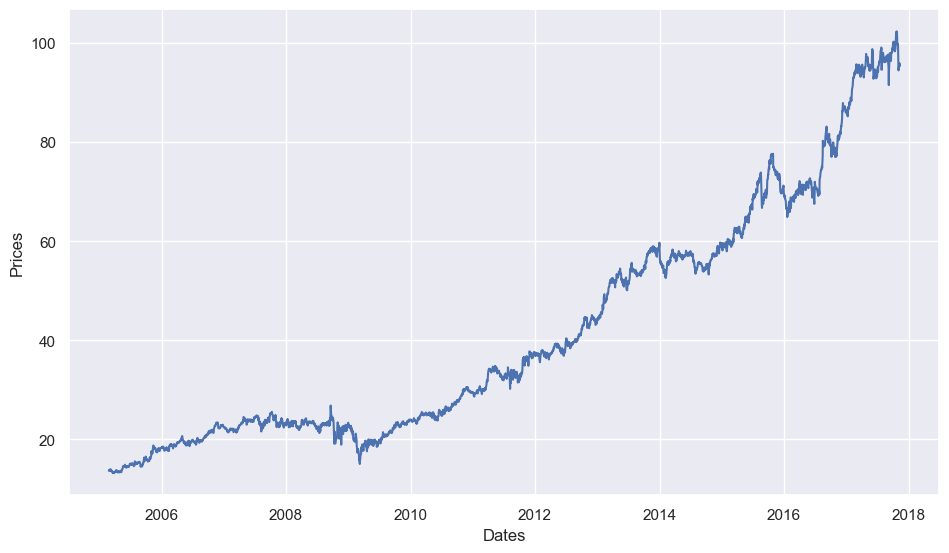

In [402]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(dfsp['Close'])
plt.show()

In [403]:
from statsmodels.tsa.stattools import adfuller
def ad_fuller_func(X):
    
    rolmean = X.rolling(12).mean()
    rolstd = X.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(X, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    result_ad_fuller = adfuller(X)
    print('ADF Statistic: %f' % result_ad_fuller[0])
    print(f'p-value: {result_ad_fuller[1]}')
    
    print('Critical Values:')
    for key, value in result_ad_fuller[4].items():
        print('\t%s: %.3f' % (key, value))
    output = pd.Series(result_ad_fuller[0:4],index=['Test Statistics','p-value','No. of lags used','No. of obvs used'])
    if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
        print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
    else:
        print('Failed to Reject Ho-Time Series is Non-Stationary')

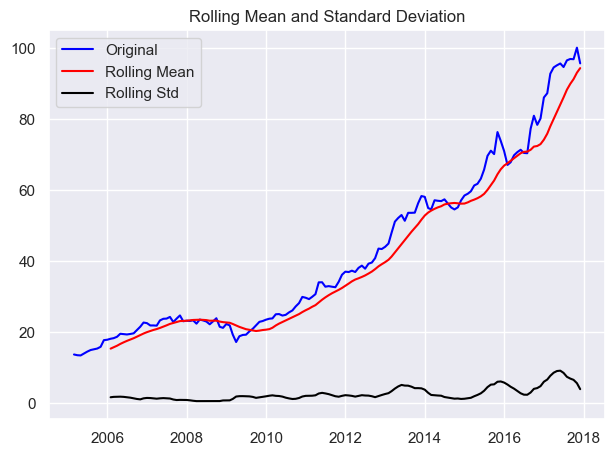

ADF Statistic: 1.874376
p-value: 0.9984856603902791
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577
Failed to Reject Ho-Time Series is Non-Stationary


In [404]:
ad_fuller_func(monthly_data['Close'])

# Making series stationary 

In [405]:
monthly_diff = monthly_data['Close'] - monthly_data['Close'].shift(1)

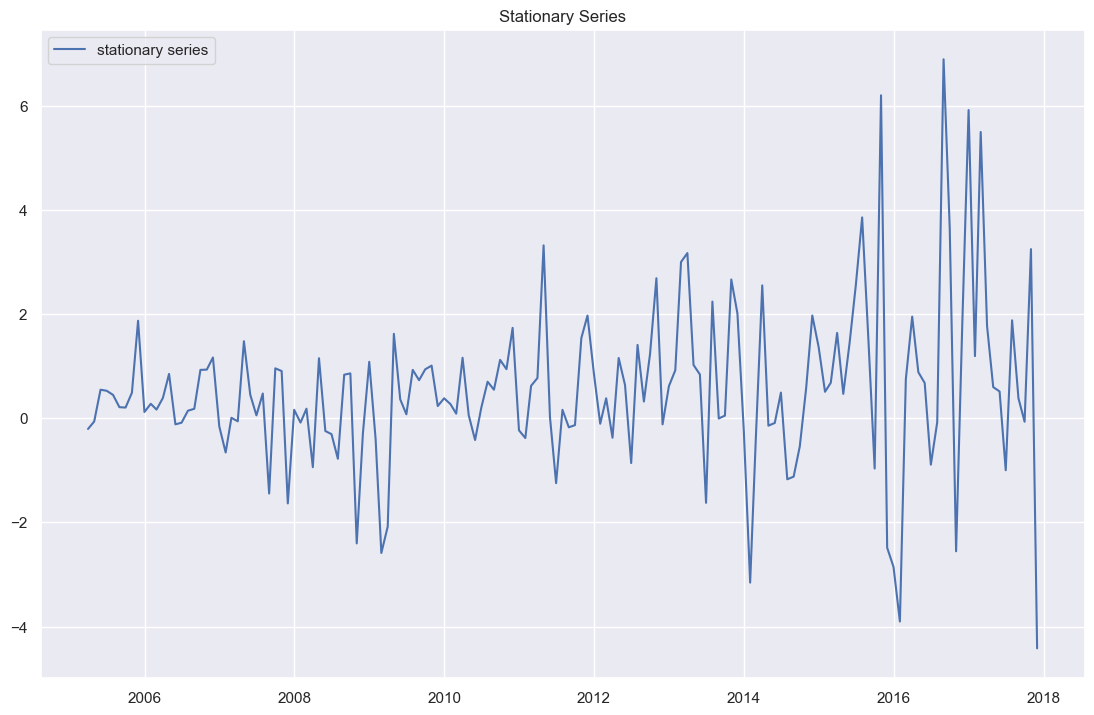

In [406]:
plt.figure(figsize=(12,8))
plt.plot(monthly_data.index, monthly_diff, label='stationary series')
plt.legend(loc='best')
plt.title("Stationary Series")
plt.show()

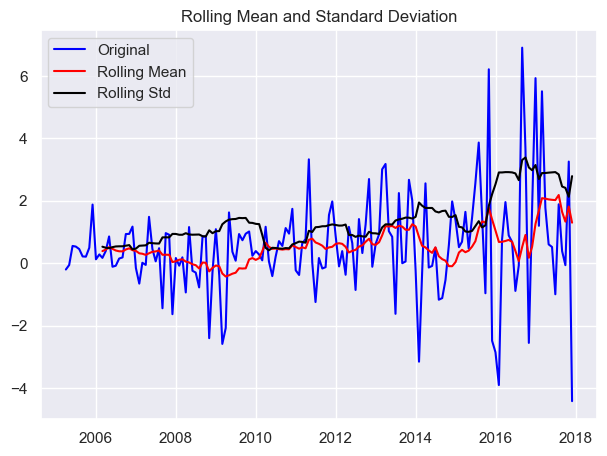

ADF Statistic: -8.965249
p-value: 8.021789122750542e-15
Critical Values:
	1%: -3.474
	5%: -2.881
	10%: -2.577
Reject Null Hypothesis(Ho)-Time Series is Stationary


In [407]:
ad_fuller_func(monthly_diff.dropna())

In [408]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


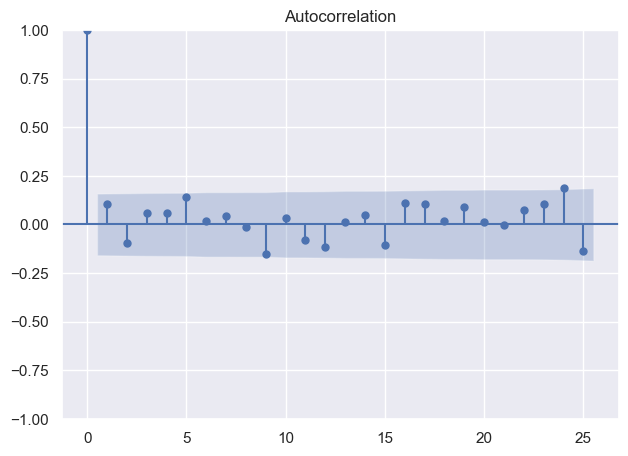

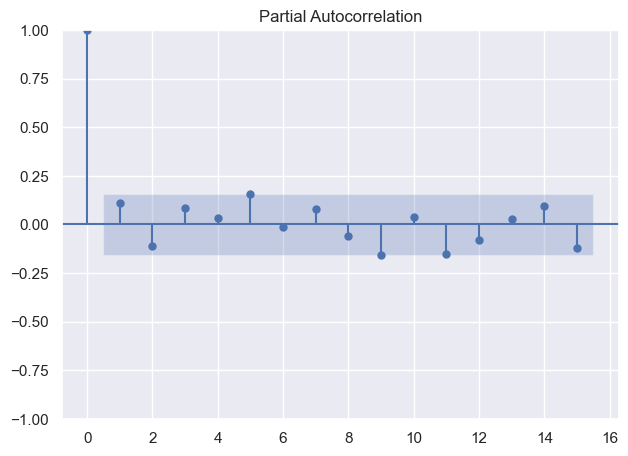

In [409]:
plot_acf(monthly_diff.dropna(), lags=25)
plot_pacf(monthly_diff.dropna(), lags=15)
plt.show()

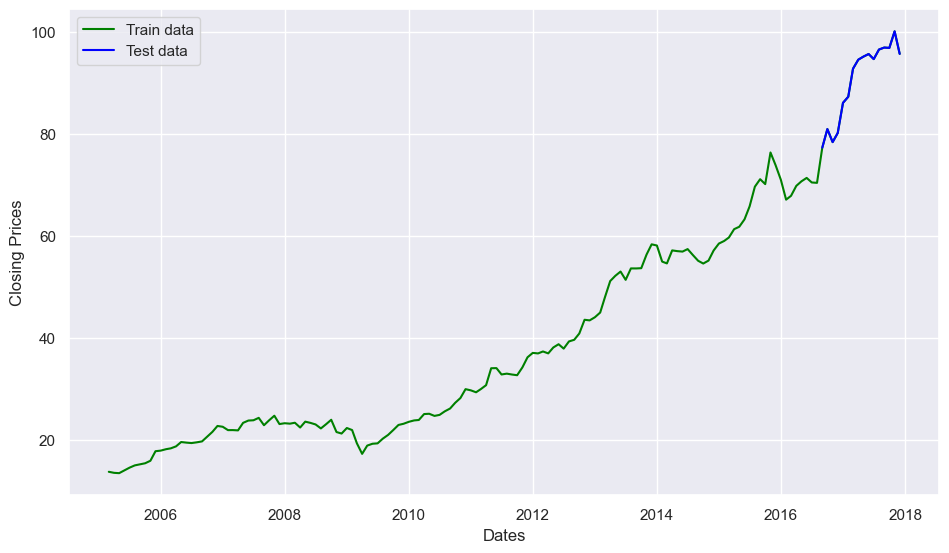

In [413]:
#split data into test data and train data
train_data, test_data = modelling_series[3:int(len(modelling_series)*0.9)], modelling_series[int(len(modelling_series)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(modelling_series, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [414]:
train_data.head()

Date
2005-05-31    14.037762
2005-06-30    14.565091
2005-07-31    15.012850
2005-08-31    15.225130
2005-09-30    15.429905
Freq: M, Name: Close, dtype: float64

In [415]:
modelling_series = monthly_data['Close']
modelling_series

Date
2005-02-28     13.760000
2005-03-31     13.553682
2005-04-30     13.490381
2005-05-31     14.037762
2005-06-30     14.565091
                 ...    
2017-07-31     96.548500
2017-08-31     96.932609
2017-09-30     96.865500
2017-10-31    100.113182
2017-11-30     95.693750
Freq: M, Name: Close, Length: 154, dtype: float64

In [433]:

# 1,1,2 ARIMA Model
model = ARIMA(train_data, order=(1,1,2))
model_fit = model.fit()
print(model_fit.summary())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  135
Model:                 ARIMA(1, 1, 2)   Log Likelihood                -229.620
Date:                Tue, 03 Jan 2023   AIC                            467.239
Time:                        19:11:18   BIC                            478.830
Sample:                    05-31-2005   HQIC                           471.949
                         - 07-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8963      0.099     -9.051      0.000      -1.090      -0.702
ma.L1          1.1540      0.118      9.799      0.000       0.923       1.385
ma.L2          0.1772      0.073      2.422      0.0

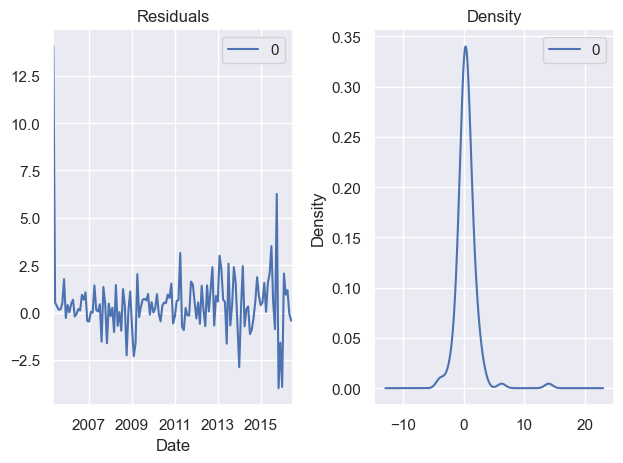

In [434]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.tight_layout()

In [455]:

fc = model_fit.forecast(15, alpha=0.05)
se = model_fit.forecast(15, alpha=0.05)
conf = model_fit.forecast(15, alpha=0.05)

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  135
Model:                 ARIMA(3, 2, 1)   Log Likelihood                -226.555
Date:                Tue, 03 Jan 2023   AIC                            463.109
Time:                        19:37:08   BIC                            477.561
Sample:                    05-31-2005   HQIC                           468.982
                         - 07-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1556      0.071      2.198      0.028       0.017       0.294
ar.L2         -0.1375      0.085     -1.613      0.107      -0.304       0.030
ar.L3         -0.0342      0.092     -0.370      0.7

In [456]:
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:0], index=test_data.index)
upper_series = pd.Series(conf[:1], index=test_data.index)

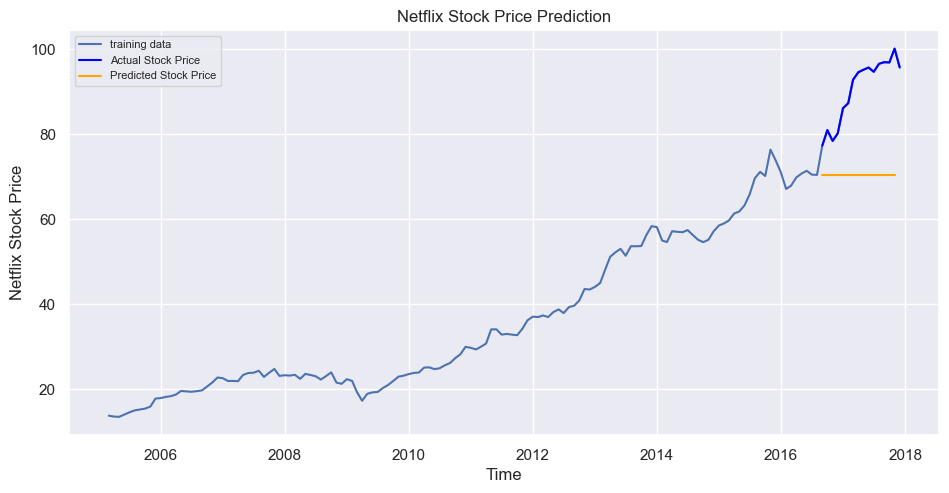

In [457]:
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(modelling_series, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series,'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, color='k', alpha=0.15)
plt.title('Netflix Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Netflix Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()
